 Salary -> Predict salary hike using experience.

In [1]:
#load the libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.corr() # we found out corelation between the two variables which is 0.97. This is a good correlation.

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


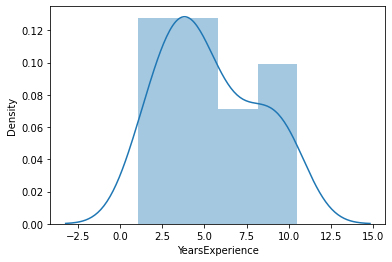

In [6]:
import seaborn as sns
sns.distplot(data['YearsExperience']) # Plot the density graph to check the distribution of data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


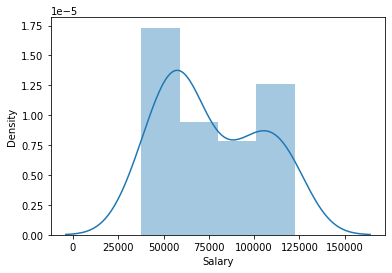

In [7]:
import seaborn as sns
sns.distplot(data['Salary'])

Fitting a linear regression model:

In [8]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

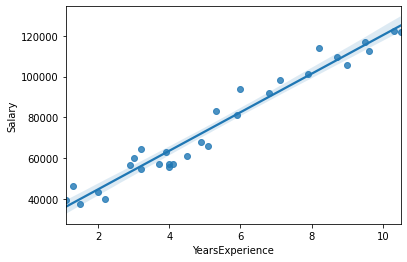

In [11]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

Now we have to test the model.

In [12]:
#Coefficients
model.params 

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

From above result we can see that the Bo =  25792.200199 And B1= 9449.962321


In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


We can see that P value for slope is = 1.143068e-20 < 0.05.

In [14]:
#R squared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

As Rsquare value is 0.95 it is good model

Now we can Predict the new data point 

In [15]:
#Predict for sorting time 11 and 13
newdata=pd.Series([11,13])

In [17]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [18]:
data_pred

YearsExperience
0               11
1               13

In [19]:
model.predict(data_pred)

0    129741.785735
1    148641.710378
dtype: float64